Add back the constant var(d) to each bootstrap efficient frontier which has been taken out of the quadratic objective for simplicity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


### load data

In [2]:
# demand factor

file = open('../../preprocessing/s_demand.pkl', 'rb')

s_demand = pickle.load(file)

file.close()

s_demand.describe()

count    87672.000000
mean         0.672161
std          0.092507
min          0.423928
25%          0.601167
50%          0.677592
75%          0.741519
max          1.000000
Name: NEM, dtype: float64

In [3]:
# load LCQP results

file1 = open('result_bootstrap.pkl', 'rb')

EF = pickle.load(file1)

file1.close()


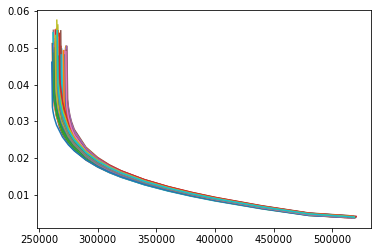

In [4]:
for bs in range(100):

    plt.plot(EF[bs].iloc[-2], EF[bs].iloc[-1])
plt.show()

In [5]:
# bootstrap selections
file2 = open('M_bootstrap.pkl', 'rb')

M_bootstrap = pickle.load(file2)

file2.close()

M_bootstrap.shape

(100, 17520)

In [6]:
# compute var(d)

for bs in range(100):
    idx_selection=M_bootstrap[bs]
    _s_demand=s_demand.iloc[idx_selection]
    _vard=_s_demand.var()
    print(bs, _vard)
    
    EF[bs].loc['sigma_sq'][1:]=EF[bs].loc['sigma_sq'][1:]+_vard
    
    

0 0.008603750265838973
1 0.008606023611206567
2 0.00858688561784039
3 0.008573665825225545
4 0.008667313331884443
5 0.008540292624251876
6 0.008539599654952042
7 0.008492542011611356
8 0.008582280227817596
9 0.00852385801284025
10 0.008456086202524022
11 0.008629819049665295
12 0.008621902106620451
13 0.008550779885175632
14 0.008629229248619492
15 0.008604895391129446
16 0.008442617323739972
17 0.008552771062244667
18 0.008504598633391158
19 0.00848821605611356
20 0.008608618792926095
21 0.008533479315889056
22 0.008539438019829022
23 0.008530253155728744
24 0.008581302197492086
25 0.008591294981847063
26 0.008578769745988623
27 0.008633828037393541
28 0.00844701528911689
29 0.008499295392479012
30 0.008502536355492972
31 0.00850633384581125
32 0.008546620561610424
33 0.00860882140954325
34 0.00851284122005325
35 0.008540920310040976
36 0.00859378785591977
37 0.008556187094888115
38 0.008599412384100004
39 0.008609014739942453
40 0.008533633051024635
41 0.008524967158283355
42 0.00846

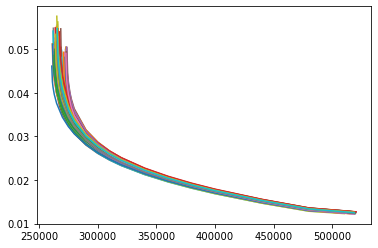

In [7]:
for bs in range(100):

    plt.plot(EF[bs].iloc[-2], EF[bs].iloc[-1])
plt.show()

In [8]:
# pickle save
import pickle

file_out = open('result_bootstrap_vard.pkl', 'wb')

# dump information to that file
pickle.dump(EF, file_out)

# close the file
file_out.close()